In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dropout, Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
import numpy as np
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
batch_size = 32
epochs = 50
num_classes = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [4]:
# =====> Take only part of data
# idx = np.random.randint(x_train.shape[0], size=20000)
# x_train = x_train[idx, :]
# y_train = y_train[idx]

In [5]:
print("Training data size X: ", x_train.shape, " Y train: ", y_train.shape)
print("Training data size X: ", x_test.shape, " Y train: ", y_test.shape)

Training data size X:  (50000, 32, 32, 3)  Y train:  (50000, 1)
Training data size X:  (10000, 32, 32, 3)  Y train:  (10000, 1)


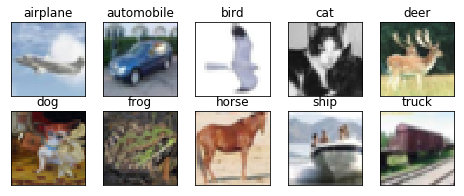

In [6]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd', metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [11]:
# ====> running the model with batch normalization and dropouts

# ===> Model without dropouts

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

# model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 15, 15, 64)       

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.9480 - accuracy: 0.2918 - val_loss: 1.9170 - val_accuracy: 0.3370
Epoch 2/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.5375 - accuracy: 0.4504 - val_loss: 1.4203 - val_accuracy: 0.4884
Epoch 3/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.3590 - accuracy: 0.5160 - val_loss: 1.3408 - val_accuracy: 0.5264
Epoch 4/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.2305 - accuracy: 0.5649 - val_loss: 1.2137 - val_accuracy: 0.5639
Epoch 5/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.1226 - accuracy: 0.6058 - val_loss: 1.2320 - val_accuracy: 0.5746
Epoch 6/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.0279 - accuracy: 0.6377 - val_loss: 1.1211 - val_accuracy: 0.6039
Epoch 7/50
50000/50000 [==============================] - 8s 

In [13]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 169us/step - loss: 6.2155e-05 - accuracy: 1.0000 - val_loss: 3.1964 - val_accuracy: 0.6875
Epoch 2/50
50000/50000 [==============================] - 8s 168us/step - loss: 5.9458e-05 - accuracy: 1.0000 - val_loss: 3.2082 - val_accuracy: 0.6872
Epoch 3/50
50000/50000 [==============================] - 8s 169us/step - loss: 5.7021e-05 - accuracy: 1.0000 - val_loss: 3.2194 - val_accuracy: 0.6877
Epoch 4/50
50000/50000 [==============================] - 9s 178us/step - loss: 5.4811e-05 - accuracy: 1.0000 - val_loss: 3.2300 - val_accuracy: 0.6873
Epoch 5/50
50000/50000 [==============================] - 8s 168us/step - loss: 5.2761e-05 - accuracy: 1.0000 - val_loss: 3.2402 - val_accuracy: 0.6874
Epoch 6/50
50000/50000 [==============================] - 8s 168us/step - loss: 5.0832e-05 - accuracy: 1.0000 - val_loss: 3.2503 - val_accuracy: 0.6871
Epoch 7/50
50000/50000 [==============

In [14]:
# ===> Model without dropouts

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)       

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 361us/step - loss: 1.6969 - accuracy: 0.4077 - val_loss: 1.2613 - val_accuracy: 0.5495
Epoch 2/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.3068 - accuracy: 0.5310 - val_loss: 1.1830 - val_accuracy: 0.5754
Epoch 3/50
50000/50000 [==============================] - 16s 327us/step - loss: 1.1438 - accuracy: 0.5941 - val_loss: 0.9832 - val_accuracy: 0.6515
Epoch 4/50
50000/50000 [==============================] - 17s 331us/step - loss: 1.0443 - accuracy: 0.6301 - val_loss: 0.9723 - val_accuracy: 0.6516
Epoch 5/50
50000/50000 [==============================] - 17s 334us/step - loss: 0.9639 - accuracy: 0.6587 - val_loss: 0.8387 - val_accuracy: 0.7039
Epoch 6/50
50000/50000 [==============================] - 17s 345us/step - loss: 0.9029 - accuracy: 0.6793 - val_loss: 0.7825 - val_accuracy: 0.7197
Epoch 7/50
50000/50000 [==============================] 

In [16]:
# ====> Use L2 regularization inplace of dropouts and see the result

# ===> Model without dropouts

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)       

In [17]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 351us/step - loss: 7.7820 - accuracy: 0.4619 - val_loss: 5.8097 - val_accuracy: 0.5405
Epoch 2/50
50000/50000 [==============================] - 16s 328us/step - loss: 4.4856 - accuracy: 0.6071 - val_loss: 3.4883 - val_accuracy: 0.6296
Epoch 3/50
50000/50000 [==============================] - 16s 329us/step - loss: 2.7734 - accuracy: 0.6796 - val_loss: 2.2253 - val_accuracy: 0.6960
Epoch 4/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.8553 - accuracy: 0.7204 - val_loss: 1.5899 - val_accuracy: 0.7226
Epoch 5/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.3558 - accuracy: 0.7493 - val_loss: 1.2833 - val_accuracy: 0.7278
Epoch 6/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.0700 - accuracy: 0.7728 - val_loss: 1.0462 - val_accuracy: 0.7578
Epoch 7/50
50000/50000 [==============================] 

In [18]:
# ===> Use dropouts with L2 regularization and batch normalization

# ====> Use L2 regularization inplace of dropouts and see the result

# ===> Model without dropouts

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)       

In [19]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 369us/step - loss: 7.9202 - accuracy: 0.4057 - val_loss: 5.7586 - val_accuracy: 0.5393
Epoch 2/50
50000/50000 [==============================] - 18s 357us/step - loss: 4.6314 - accuracy: 0.5468 - val_loss: 3.5233 - val_accuracy: 0.6091
Epoch 3/50
50000/50000 [==============================] - 17s 343us/step - loss: 2.9202 - accuracy: 0.6201 - val_loss: 2.4846 - val_accuracy: 0.6125
Epoch 4/50
50000/50000 [==============================] - 17s 340us/step - loss: 1.9928 - accuracy: 0.6662 - val_loss: 1.6305 - val_accuracy: 0.7033
Epoch 5/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.4899 - accuracy: 0.6943 - val_loss: 1.2855 - val_accuracy: 0.7163
Epoch 6/50
50000/50000 [==============================] - 17s 341us/step - loss: 1.2132 - accuracy: 0.7214 - val_loss: 1.1792 - val_accuracy: 0.7024
Epoch 7/50
50000/50000 [==============================] 

In [20]:
# =====> model with extra CNN layers
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)       

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 23s 463us/step - loss: 5.5301 - accuracy: 0.3827 - val_loss: 4.1010 - val_accuracy: 0.4998
Epoch 2/50
50000/50000 [==============================] - 22s 433us/step - loss: 3.3290 - accuracy: 0.5307 - val_loss: 2.8417 - val_accuracy: 0.5042
Epoch 3/50
50000/50000 [==============================] - 21s 425us/step - loss: 2.2254 - accuracy: 0.5967 - val_loss: 1.9177 - val_accuracy: 0.6051
Epoch 4/50
50000/50000 [==============================] - 21s 419us/step - loss: 1.6104 - accuracy: 0.6446 - val_loss: 1.3054 - val_accuracy: 0.6965
Epoch 5/50
50000/50000 [==============================] - 21s 423us/step - loss: 1.2669 - accuracy: 0.6766 - val_loss: 1.1078 - val_accuracy: 0.6977
Epoch 6/50
50000/50000 [==============================] - 21s 421us/step - loss: 1.0709 - accuracy: 0.6978 - val_loss: 1.0380 - val_accuracy: 0.6874
Epoch 7/50
50000/50000 [==============================] 